In [1]:

from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
import scipy as sp
from pylab import show,hist,subplot,figure 
from numpy import linalg as nla
import matplotlib.pyplot as plt
from copy import copy, deepcopy
from matplotlib import pyplot
import matplotlib.font_manager as font_manager
from scipy.optimize import curve_fit


In [ ]:

# IN:
# print(np.shape(xCM_Vec))
# print(np.shape(yCM_Vec))
# print(np.shape(t_Vec))
# print(np.shape(nb_Vec))

# OUT:
# (30001,)
# (30001,)
# (30001,)
# (30000,)

# careful, nb_Vec is shorter than the other vectors  


# Loading the data from the simulation results

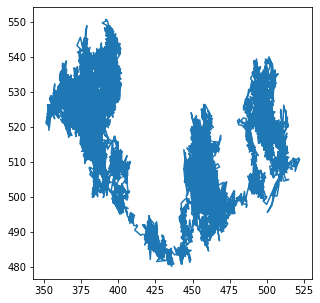

In [2]:
## from the simulation program 
##
## np.save('t_Vec',t_Vec)
## np.save('xCM_Vec',xCM_Vec)
## np.save('yCM_Vec',yCM_Vec)
## np.save('nb_Vec',nb_Vec)

xCM_Vec=np.load('xCM_Vec.npy')
yCM_Vec=np.load('yCM_Vec.npy')
t_Vec=np.load('t_Vec.npy')
nb_Vec=np.load('nb_Vec.npy')


f=plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
plt.plot(xCM_Vec,yCM_Vec)
plt.show()


Dt_sim = 9.999999999999982e-05 Di = 1
vectors have been coarse-grained


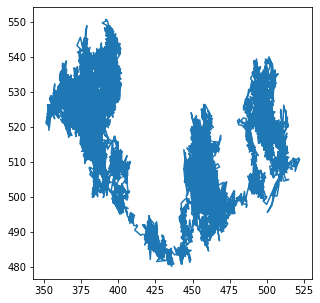

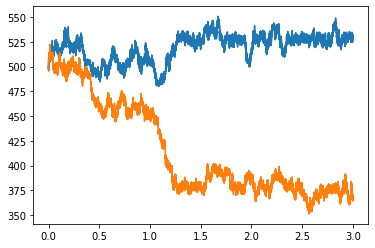

In [3]:

Dt_sim=t_Vec[1]-t_Vec[0]
Dt_D=0.0001
Di=int(Dt_D/Dt_sim)


print('Dt_sim =',Dt_sim,'Di =',Di)

# first we CG the vectors 
#
xCM_CG_Vec=np.array([])
yCM_CG_Vec=np.array([])
t_CG_Vec=np.array([])
#nb_CG_Vec=np.array([])

for iid in range(np.shape(xCM_Vec)[0]):
    if(np.mod(iid,Di)==0):
        av_xCM=0.0 
        av_yCM=0.0 
        av_t=0.0 
        av_nb=0.0
        av=0.0
    av_xCM+=xCM_Vec[iid]
    av_yCM+=yCM_Vec[iid]
    av_t+=t_Vec[iid]
#    av_nb+=nb_Vec[iid]
    av+=1.0
    if(np.mod(iid+1,Di)==0):
        xCM_CG_Vec=np.append(xCM_CG_Vec,av_xCM/av)
        yCM_CG_Vec=np.append(yCM_CG_Vec,av_yCM/av)
        t_CG_Vec=np.append(t_CG_Vec,av_t/av)
#        nb_CG_Vec=np.append(nb_CG_Vec,av_nb/av)

print('vectors have been coarse-grained')

f=plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
plt.plot(xCM_CG_Vec,yCM_CG_Vec)
plt.show()

plt.plot(t_CG_Vec,yCM_CG_Vec)
plt.plot(t_CG_Vec,xCM_CG_Vec)
plt.show()



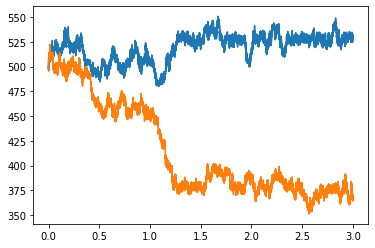

In [4]:
plt.plot(t_CG_Vec,yCM_CG_Vec)
plt.plot(t_CG_Vec,xCM_CG_Vec)
plt.show()

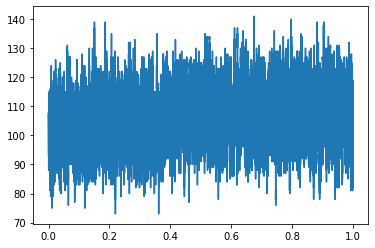

In [5]:

it_Vec=np.linspace(0,1,np.shape(nb_Vec)[0])
plt.plot(it_Vec,nb_Vec)
plt.show()

In [6]:

t_D=0.2
i_D=int(t_D/Dt_D)

print('t traj =',t_CG_Vec[np.shape(t_CG_Vec)[0]-1], 'Delta t_max employed =',t_D, 'i_D max =',i_D)

r2_Vec=np.array([0.0])
Dt_Vec=np.array([0.0])

ii=1
while(ii<i_D+1):

    r2_av=0
    av=0

    jj=0

    while(jj<np.shape(xCM_CG_Vec)[0]-ii-1):
        r2_av+=np.power(xCM_CG_Vec[jj]-xCM_CG_Vec[jj+ii],2)+np.power(yCM_CG_Vec[jj]-yCM_CG_Vec[jj+ii],2)
        av+=1.0
        jj+=1

    r2_Vec=np.append(r2_Vec,r2_av/av)
    Dt_Vec=np.append(Dt_Vec,ii*(t_CG_Vec[1]-t_CG_Vec[0]))

    ii+=1
    
#    print(ii)

    if(np.mod(ii,int(i_D/10))==0):
        print('ii =',ii)


t traj = 3.0000000000654294 Delta t_max employed = 0.2 i_D max = 2000
ii = 200
ii = 400
ii = 600
ii = 800
ii = 1000
ii = 1200
ii = 1400
ii = 1600
ii = 1800
ii = 2000


# Plotting and fitting r2(Delta t)

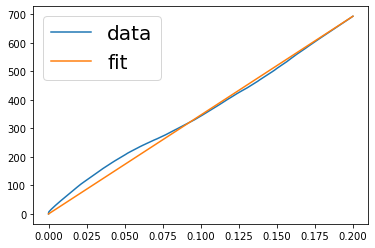

In [10]:
plt.plot(Dt_Vec,r2_Vec,label='data')
plt.plot(Dt_Vec,Dfunc(Dt_Vec),label='fit')
plt.legend(fontsize=20)
plt.show()

# Fitting D 

In [9]:
def fit_function(x, D):
    return (2*x*D )

popt, pcov = curve_fit(fit_function, xdata=Dt_Vec, ydata=r2_Vec)
print(popt, pcov)     
    
def Dfunc(x):
    D=1731.61
    return 2*x*D

[1731.61503422] [[3.00831326]]


# sampled diffusion constant

In [ ]:
D_list_10m=np.array([2302.56002315])

# storing the r2

In [27]:
np.save('t_run1_Vec',Dt_Vec)
np.save('xCM_run1_Vec',r2_Vec)

In [12]:
636.6197723675814*np.pi*100*100/(np.average(nb_Vec)**2)

1841.5352296539422